In [19]:
!pip install Sastrawi
!pip install wordcloud


In [24]:
# 2. Import Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import re
import string
import nltk
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

In [25]:
# 3. Download Stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('indonesian'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


load dataset

In [26]:
# 4. Load Dataset
df = pd.read_csv('gojekbaru.csv')  # Sesuaikan dengan path Anda
df = df[['content', 'score']].dropna()

 Pemberian Label Sentimen Berdasarkan Skor

In [27]:
# 5. Label Sentimen
def label_sentiment(score):
    if score <= 2:
        return 'negatif'
    elif score == 3:
        return 'netral'
    else:
        return 'positif'

df['sentiment'] = df['score'].apply(label_sentiment)

Preprocessing Teks (Stopword + Stemming)

In [28]:
# 6. Pra-pemrosesan Teks
factory = StemmerFactory()
stemmer = factory.create_stemmer()

def clean_text(text):
    text = text.lower()
    text = re.sub(r'\d+', '', text)
    text = text.translate(str.maketrans('', '', string.punctuation))
    text = text.strip()
    tokens = text.split()
    tokens = [word for word in tokens if word not in stop_words]
    tokens = [stemmer.stem(word) for word in tokens]
    return ' '.join(tokens)

df['clean_text'] = df['content'].astype(str).apply(clean_text)

word cloud

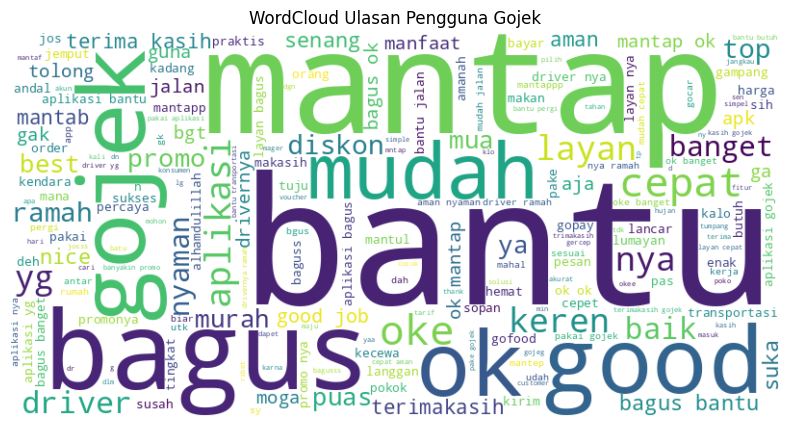

In [29]:
# 7. Visualisasi WordCloud
all_words = ' '.join(df['clean_text'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_words)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('WordCloud Ulasan Pengguna Gojek')
plt.show()

Vectorisasi dengan TF-IDF

In [30]:
# 8. TF-IDF Vectorizer
tfidf = TfidfVectorizer()
X = tfidf.fit_transform(df['clean_text'])
y = df['sentiment']

In [31]:
# 9. Split Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [32]:
# 10. Naïve Bayes Model
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)
y_pred_nb = nb_model.predict(X_test)

In [33]:
# 11. SVM Model
svm_model = LinearSVC()
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)

In [34]:
# 12. Evaluasi Naïve Bayes
print("=== Evaluasi Naïve Bayes ===")
print("Akurasi:", accuracy_score(y_test, y_pred_nb))
print(classification_report(y_test, y_pred_nb))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_nb))

=== Evaluasi Naïve Bayes ===
Akurasi: 0.9751415984896161
              precision    recall  f1-score   support

     negatif       0.00      0.00      0.00        62
      netral       0.00      0.00      0.00        17
     positif       0.98      1.00      0.99      3099

    accuracy                           0.98      3178
   macro avg       0.33      0.33      0.33      3178
weighted avg       0.95      0.98      0.96      3178

Confusion Matrix:
 [[   0    0   62]
 [   0    0   17]
 [   0    0 3099]]


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [35]:
# 13. Evaluasi SVM
print("\n=== Evaluasi SVM ===")
print("Akurasi:", accuracy_score(y_test, y_pred_svm))
print(classification_report(y_test, y_pred_svm))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_svm))


=== Evaluasi SVM ===
Akurasi: 0.9779735682819384
              precision    recall  f1-score   support

     negatif       0.85      0.18      0.29        62
      netral       0.00      0.00      0.00        17
     positif       0.98      1.00      0.99      3099

    accuracy                           0.98      3178
   macro avg       0.61      0.39      0.43      3178
weighted avg       0.97      0.98      0.97      3178

Confusion Matrix:
 [[  11    0   51]
 [   0    0   17]
 [   2    0 3097]]


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
